In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = '/content/data01.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


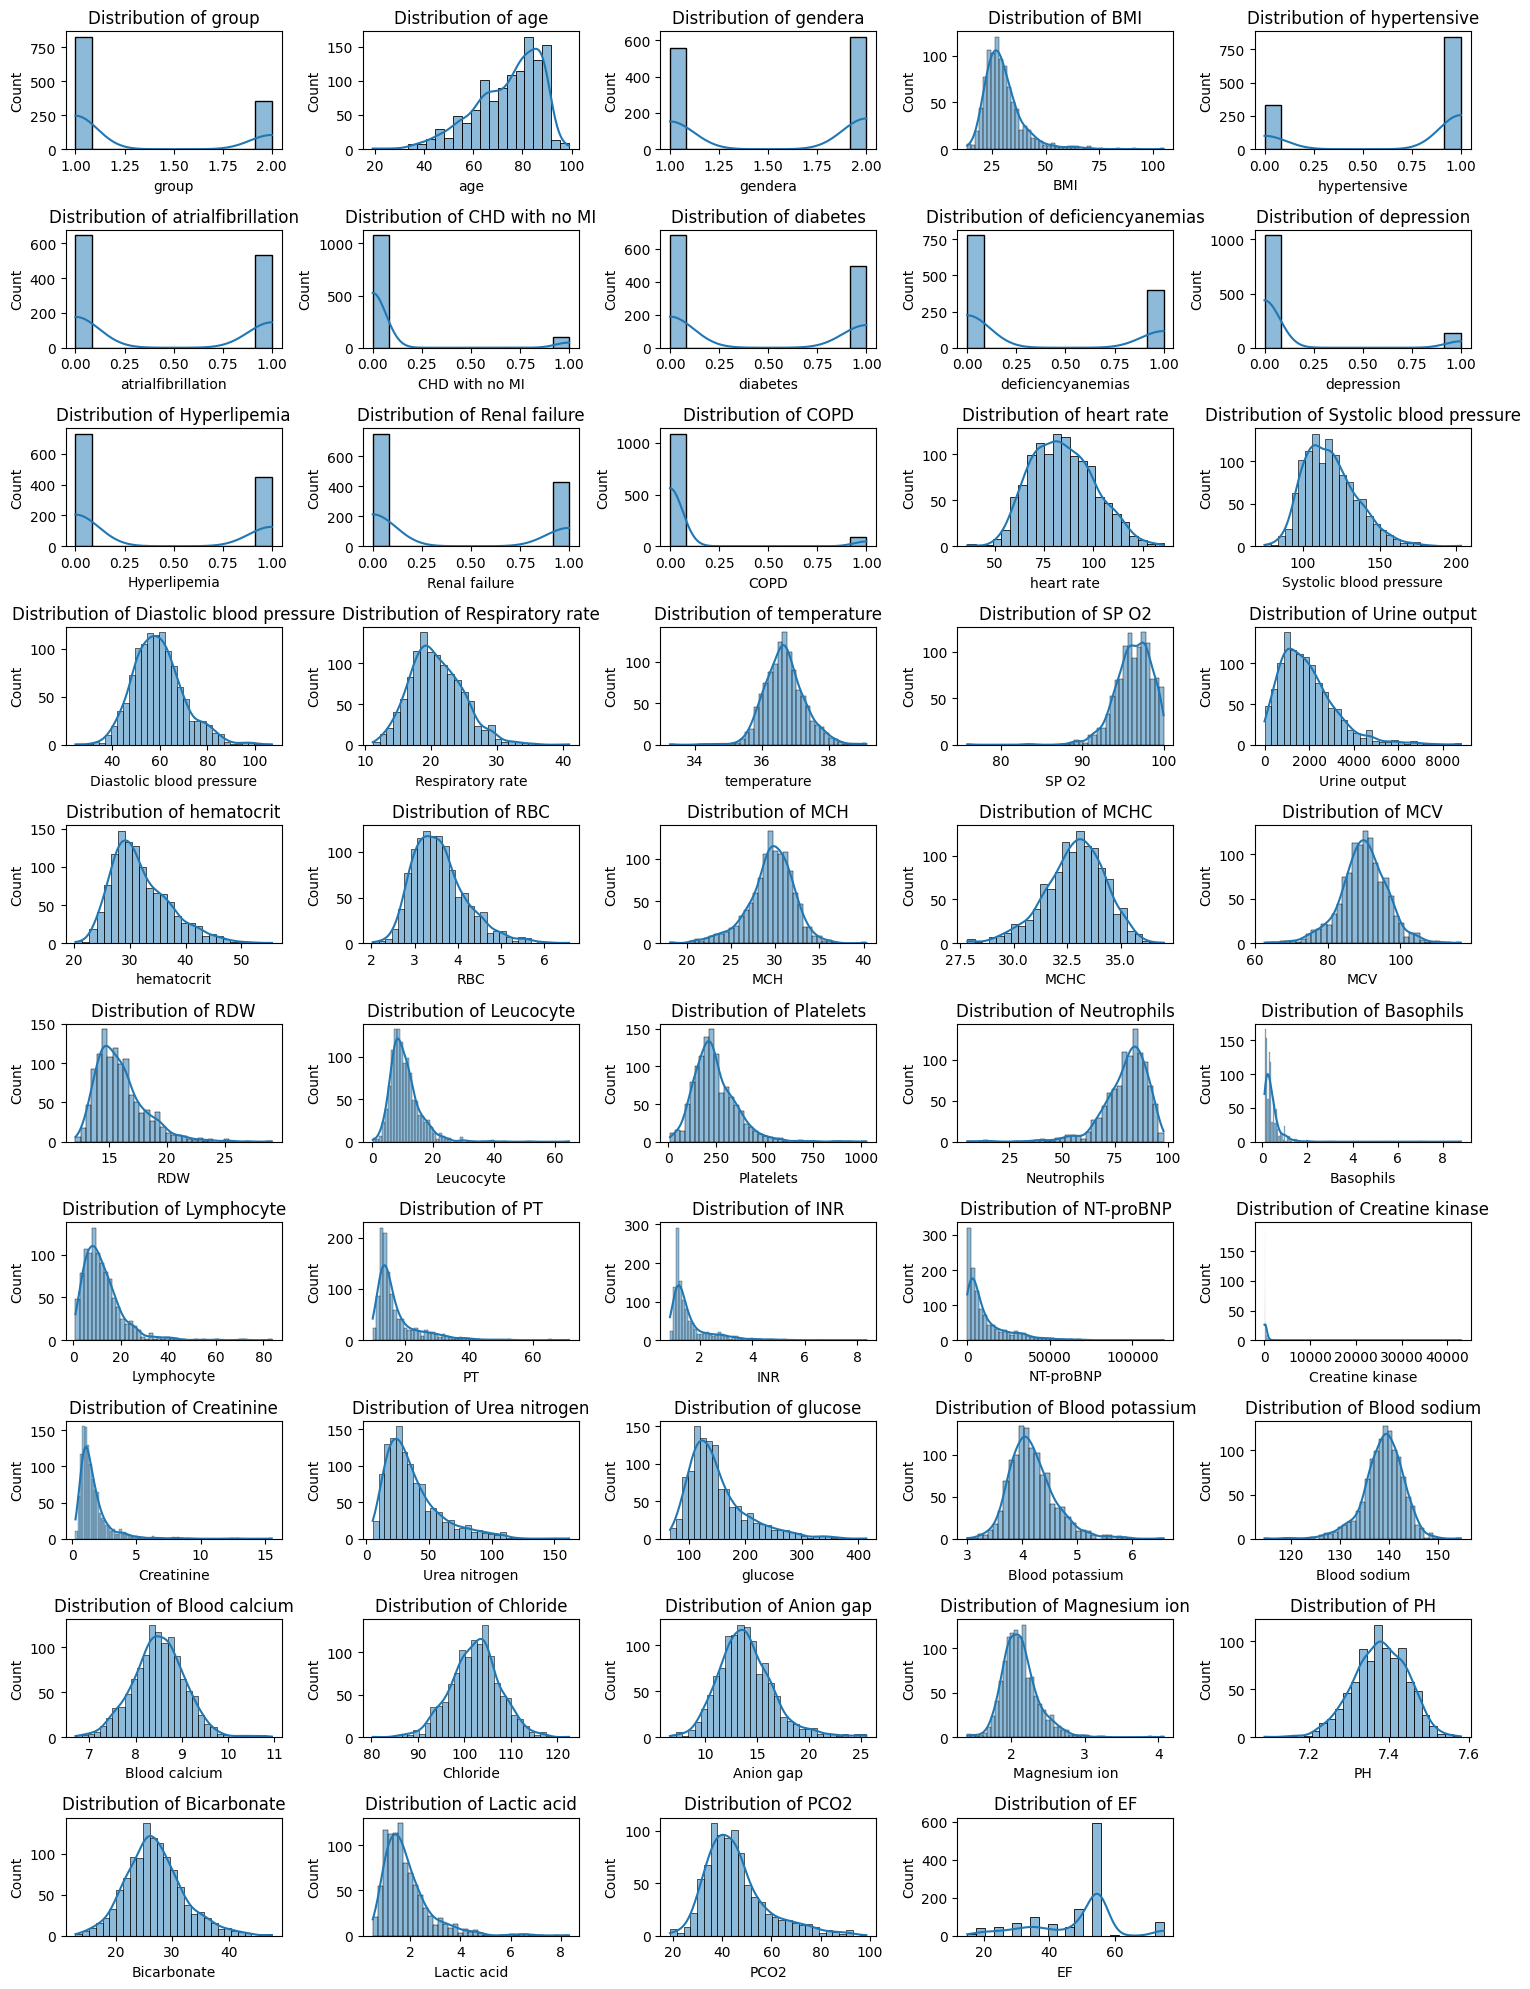

In [ ]:
# Plotting histograms for numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(10, 5, i)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

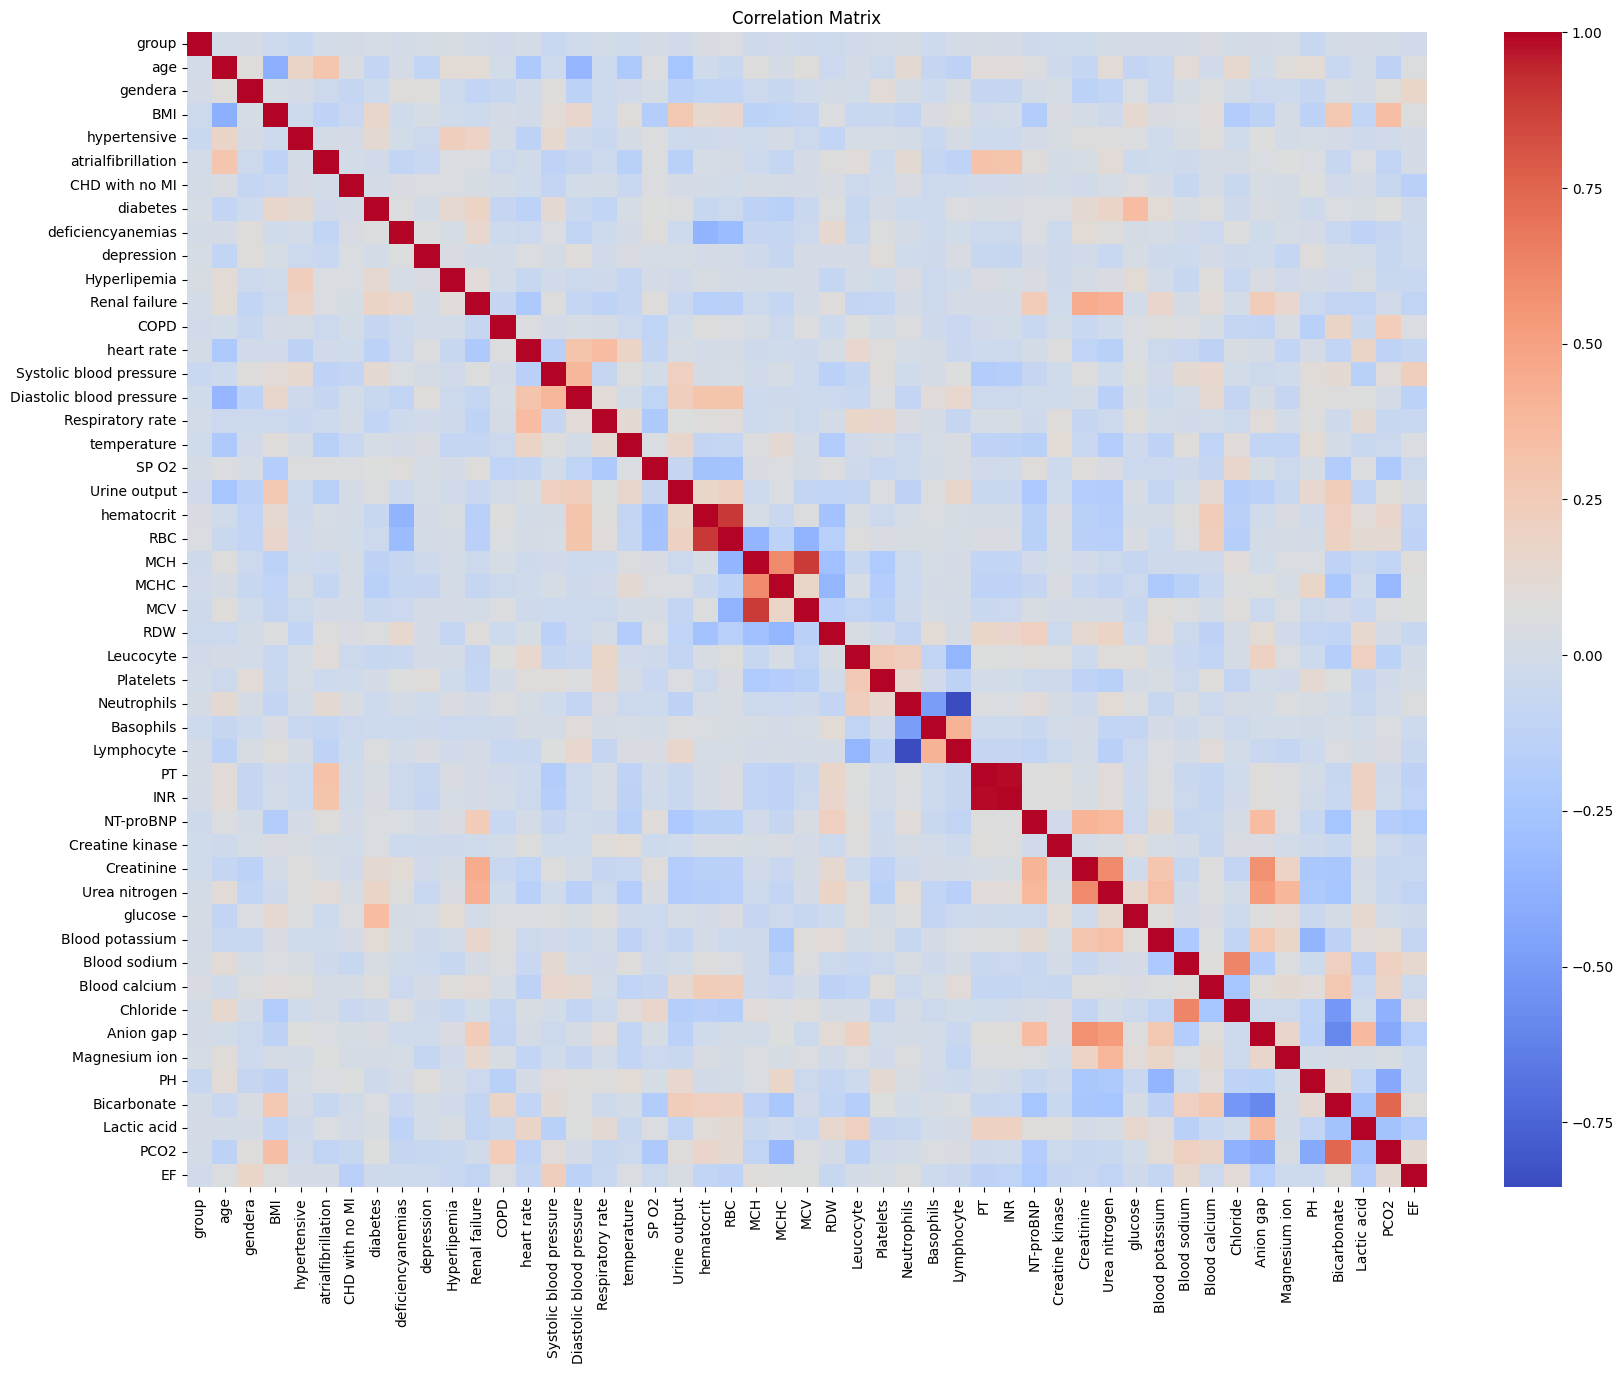

In [ ]:
# Plotting the correlation matrix
plt.figure(figsize=(20, 15))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

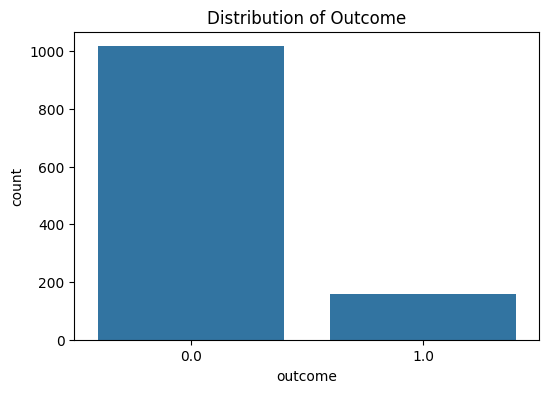

In [ ]:
# Plotting the outcome distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Outcome')
plt.show()

## RandomForestClassifire

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your data
data = pd.read_csv('/content/data01.csv')

# Separating features and target variable
X = data.drop(columns=['outcome', 'ID'])
y = data['outcome']

# Handle missing values in the target variable
data = data.dropna(subset=['outcome'])
X = data.drop(columns=['outcome', 'ID'])
y = data['outcome']

# Handle missing values
X = X.fillna(X.median())

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)


Accuracy: 0.8516949152542372
Confusion Matrix:
[[196   0]
 [ 35   5]]


## DecisionTreeClassifier


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your data
data = pd.read_csv('/content/data01.csv')

# Separating features and target variable
X = data.drop(columns=['outcome', 'ID'])
y = data['outcome']

# Handle missing values in the target variable
data = data.dropna(subset=['outcome'])
X = data.drop(columns=['outcome', 'ID'])
y = data['outcome']

# Handle missing values
X = X.fillna(X.median())

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy: {accuracy_dt}")
print("Confusion Matrix:")
print(conf_matrix_dt)


Accuracy: 0.788135593220339
Confusion Matrix:
[[171  25]
 [ 25  15]]


## Sequential

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your data
data = pd.read_csv('/content/data01.csv')

# Separating features and target variable
X = data.drop(columns=['outcome', 'ID'])
y = data['outcome']

# Handle missing values in the target variable
data = data.dropna(subset=['outcome'])
X = data.drop(columns=['outcome', 'ID'])
y = data['outcome']

# Handle missing values
X = X.fillna(X.median())

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Make predictions
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

print(f"Accuracy: {accuracy_ann}")
print("Confusion Matrix:")
print(conf_matrix_ann)


Epoch 1/50
94/94 [==============================] - 1s 2ms/step - loss: 0.4562 - accuracy: 0.8553
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8830
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8904
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.2703 - accuracy: 0.8947
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9011
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.9138
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9128
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9223
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9266
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9330
Epoch 11/50
94/94 [

## GradientBoostingClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your data
data = pd.read_csv('/content/data01.csv')

# Separating features and target variable
X = data.drop(columns=['outcome', 'ID'])
y = data['outcome']

# Handle missing values in the target variable
data = data.dropna(subset=['outcome'])
X = data.drop(columns=['outcome', 'ID'])
y = data['outcome']

# Handle missing values
X = X.fillna(X.median())

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting model
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print(f"Accuracy: {accuracy_gb}")
print("Confusion Matrix:")
print(conf_matrix_gb)


Accuracy: 0.847457627118644
Confusion Matrix:
[[190   6]
 [ 30  10]]


## KNeighborsClassifier


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your data
data = pd.read_csv('/content/data01.csv')

# Separating features and target variable
X = data.drop(columns=['outcome', 'ID'])
y = data['outcome']

# Handle missing values in the target variable
data = data.dropna(subset=['outcome'])
X = data.drop(columns=['outcome', 'ID'])
y = data['outcome']

# Handle missing values
X = X.fillna(X.median())

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the k-NN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn}")
print("Confusion Matrix:")
print(conf_matrix_knn)


Accuracy: 0.847457627118644
Confusion Matrix:
[[196   0]
 [ 36   4]]


## SVC


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('/content/data01.csv')

# Separating features and target variable
X = data.drop(columns=['outcome', 'ID'])
y = data['outcome']

# Handle missing values in the target variable
data = data.dropna(subset=['outcome'])
X = data.drop(columns=['outcome', 'ID'])
y = data['outcome']

# Handle missing values
X = X.fillna(X.median())

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print(f"Accuracy: {accuracy_svm}")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("Classification Report:")
print(class_report)



Accuracy: 0.8771186440677966
Confusion Matrix:
[[195   1]
 [ 28  12]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       196
         1.0       0.92      0.30      0.45        40

    accuracy                           0.88       236
   macro avg       0.90      0.65      0.69       236
weighted avg       0.88      0.88      0.85       236



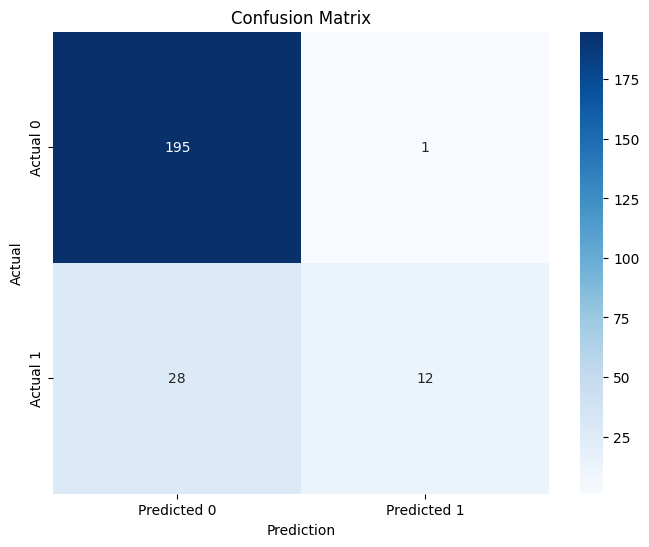

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




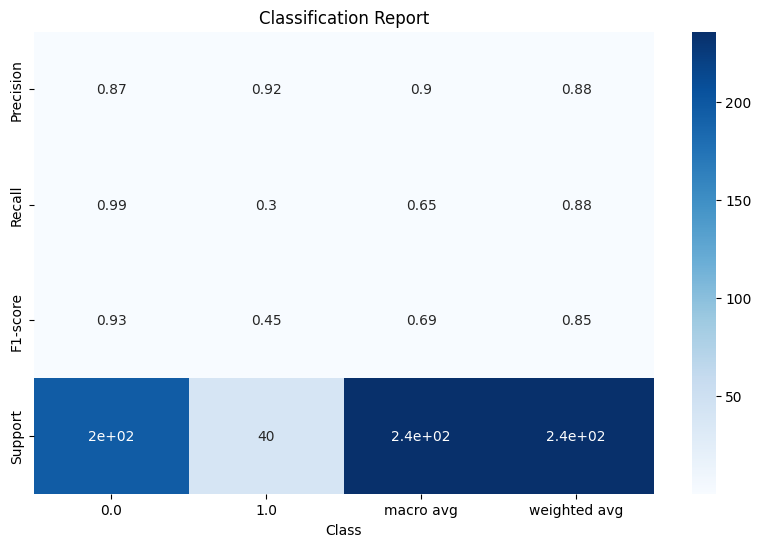

In [ ]:
# Visualize the classification report
report_data = []
for label, metrics in classification_report(y_test, y_pred_svm, output_dict=True).items():
    if isinstance(metrics, dict):
        report_data.append([label, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])

report_df = pd.DataFrame(report_data, columns=['Class', 'Precision', 'Recall', 'F1-score', 'Support'])

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.set_index('Class').T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

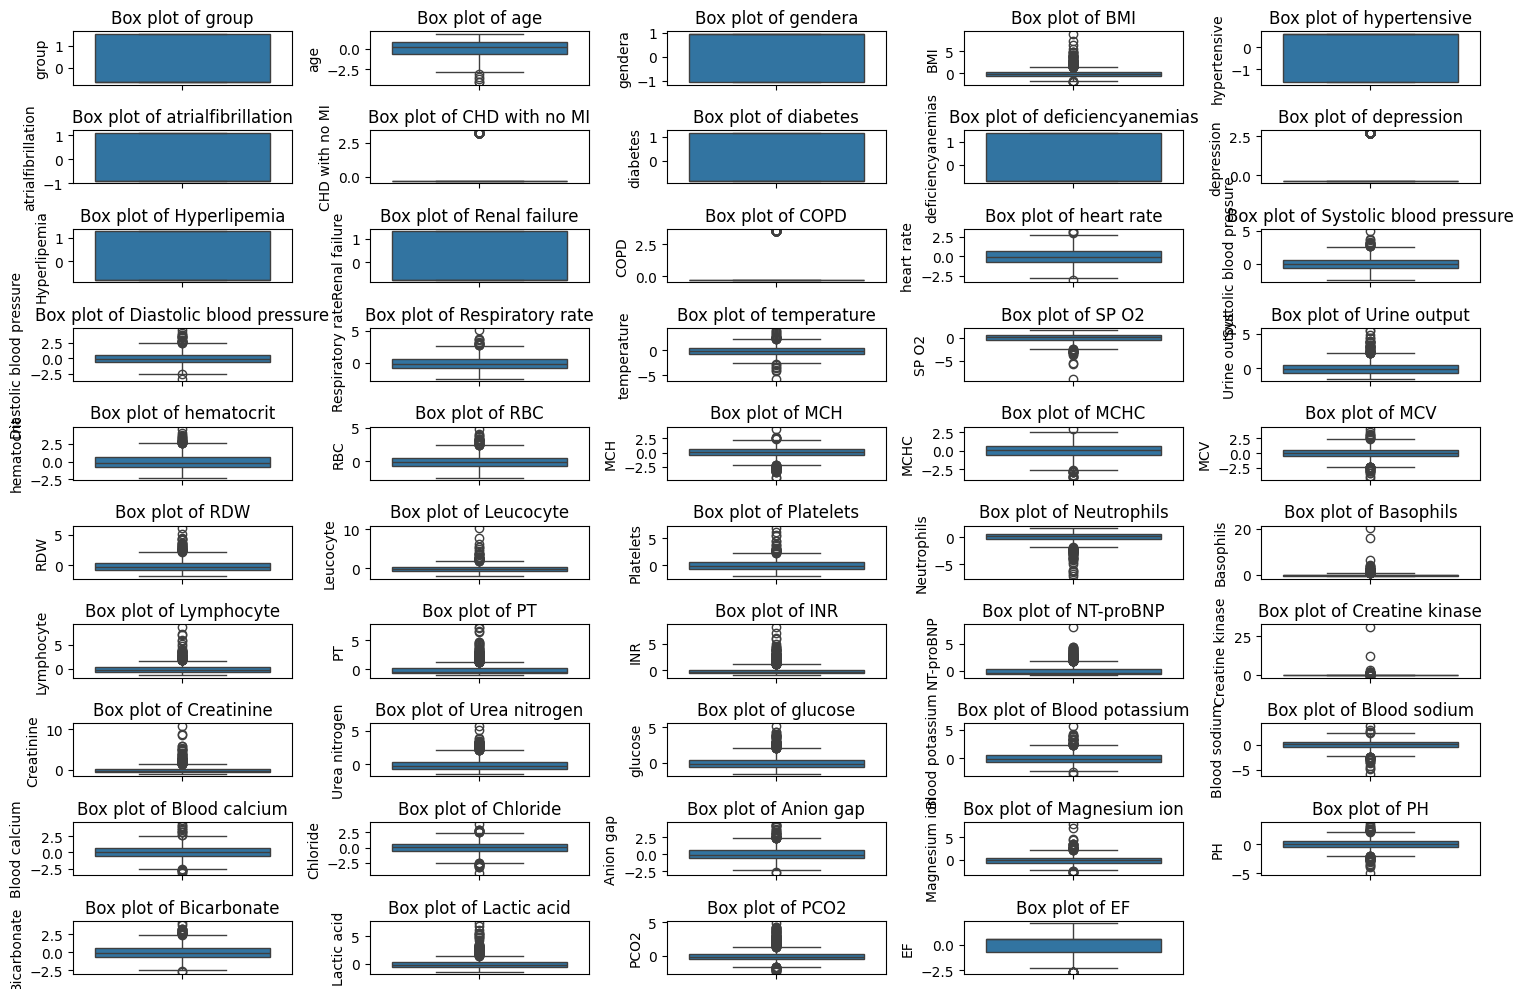

In [ ]:
# Visualize the distribution of numerical features using box plots
plt.figure(figsize=(15, 10))
numerical_cols = X.columns
X_df = pd.DataFrame(X_scaled, columns=numerical_cols)

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(10, 5, i)
    sns.boxplot(y=X_df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()